# 讀取附錄1.4.csv中的1949-1998年北京市每年最高氣溫序列。
自己編寫函數計算延遲k相關系數 $\hat \rho_k$ <br>
自己編寫函數計算LB統計量 <br>
查表，找出延遲6期、延遲12期的LB統計量的P值 <br>
利用statsdmodels的lb_test取得延遲1-12期的LB統計量和P值<br>


In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
import statsmodels.tsa.api as smt

# statsmodels自帶的畫ACF的函數

In [5]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

# 自己編寫函數計算延遲k相關系数$\hat \rho_k$

In [6]:
def testPk(y):
    ##calclate acf    
    myacf=np.ones(lag)
    num1= len(y)
    u = y.mean() #用u表示μ
    for k in range(0,17):
        Molecular = 0   #分子
        denominator = 0 #分母
        for i in range(0,num1-k):
            Molecular += (y[i] - u)*(y[i+k] - u)
        for i in range(0,num1-k):
            denominator += (y[i] - u)**2
        myacf[k] = Molecular/denominator
    return acf

# statsmodels自帶的LB test

In [7]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

# 自己編寫函數計算LB統計量

In [49]:
def mypurerandtest(y,lag):
    myacf=np.ones(lag+1)  
    n= len(y) #n为序列观察期数
    u = y.mean() #用u表示μ
    for k in range(0,lag+1):
        Molecular = 0   #分子
        denominator = 0 #分母
        for i in range(0,n-k):
            Molecular += (y[i] - u)*(y[i+k] - u)
        for i in range(0,n):
            denominator += (y[i] - u)**2
        myacf[k] = Molecular/denominator
    m = len(myacf)
    #m为指定延期期数
    LB=np.zeros(len(myacf))
    Lag=range(1,lag+1)
    for i in range(1, m):
        for j in range(1, i + 1):
            LB[i] += n * (n + 2) * (myacf[j]**2 / (n - j))
    realLB = LB[1:]
    myd=pd.DataFrame(np.c_[Lag,realLB],columns=['lags','LB'])
    myd['lags'] = myd['lags'].astype(np.int64)
    print(myd)

# 運行

statsmodels ACF


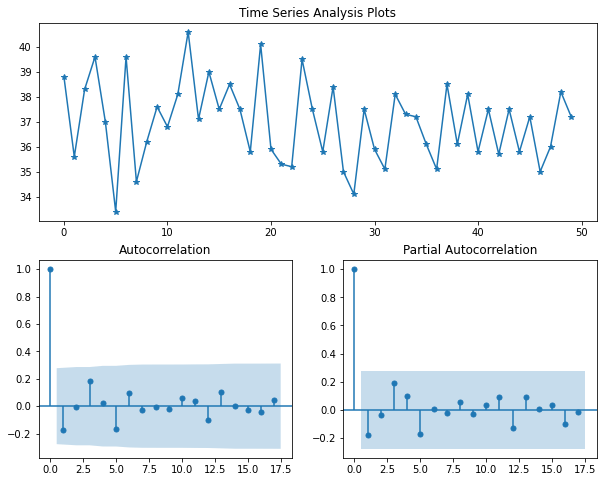

In [59]:
##read data
dfname='附录1.4'
y=pd.read_csv('%s.csv'%dfname)
y.iloc[:,1]=y.iloc[:,1].astype('float')
y=y.values[:,1]
print('statsmodels ACF')
drawts(y,dfname)


In [60]:
print('statsmodels LB test')
purerandtest(y)

statsmodels LB test


D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


----time series: LB pure randomness test----
           LB    Pvalue  lags
0    1.627019  0.202116     1
1    1.627699  0.443149     2
2    3.425279  0.330583     3
3    3.455312  0.484706     4
4    5.009396  0.414735     5
5    5.584553  0.471297     6
6    5.626350  0.583991     7
7    5.627000  0.688932     8
8    5.658475  0.773553     9
9    5.876783  0.825507    10
10   5.968791  0.875438    11
11   6.711939  0.876048    12
12   7.436738  0.878265    13
13   7.438078  0.916504    14
14   7.492019  0.942533    15
15   7.633797  0.959028    16
16   7.800646  0.970626    17
17   8.362087  0.972745    18
18   9.753236  0.958772    19
19  12.616985  0.893206    20
20  12.949710  0.910375    21
21  13.181759  0.927968    22
22  14.115310  0.923522    23


D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [61]:
print('my LBtest')
mypurerandtest(y,12)

my LBtest
    lags        LB
0      1  1.627019
1      2  1.627699
2      3  3.425279
3      4  3.455312
4      5  5.009396
5      6  5.584553
6      7  5.626350
7      8  5.627000
8      9  5.658475
9     10  5.876783
10    11  5.968791
11    12  6.711939


# 查表，找出延遲6期、延遲12期的LB統計量的P值

答：由表得:<br>
延遲6期的LB统计量的P值为：因为延迟6期的LB值是5.584553，在表中的【1.237，8.558】的范围。所以P值在【0.975，0.20】的区间范围内。
<br>延遲12期的LB统计量的P值为：因为延迟6期的LB值是6.711939，在表中的【4.404，15.812】的范围。所以P值在【0.975，0.20】的区间范围内。


# 利用statsdmodels的lb_test取得延遲1-12期的LB統計量和P值

In [65]:
lb, pvalue = lb_test(y, 12)
print('LB统计量：')
print(lb)
print('P值：')
print(pvalue)

LB统计量：
[1.62701865 1.62769915 3.4252788  3.45531193 5.00939556 5.58455329
 5.62635023 5.62700037 5.65847545 5.8767828  5.96879114 6.71193926]
P值：
[0.20211591 0.44314884 0.3305833  0.48470571 0.41473462 0.47129677
 0.58399061 0.68893245 0.77355279 0.82550695 0.87543846 0.87604806]


# 判斷1949-1998年北京市每年最高氣溫序列是否白噪聲序列
（ 𝑎𝑙𝑝ℎ𝑎 = 0.05）

答：延迟6期与延迟12期LB统计量对应P值显著大于显著性水平0.05，不能拒绝原假设，即该序列为纯随机序列。